In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pickle

In [3]:
df = pd.read_csv('telecom_churn_dataset.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df = df.drop(['customerID'], axis = 1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   8 non-null      float64
 1   tenure          8 non-null      float64
 2   MonthlyCharges  8 non-null      float64
dtypes: float64(3)
memory usage: 256.0+ bytes


In [9]:
df['TotalCharges'] = df['TotalCharges'].replace({" ":"0"})

In [10]:
df['TotalCharges'] = df['TotalCharges'].astype(float)


df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   8 non-null      float64
 1   tenure          8 non-null      float64
 2   MonthlyCharges  8 non-null      float64
 3   TotalCharges    8 non-null      float64
dtypes: float64(4)
memory usage: 320.0+ bytes


In [11]:
df.describe().isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [12]:
df.describe().sum()

SeniorCitizen      7044.530758
tenure             7264.930630
MonthlyCharges     7470.551740
TotalCharges      25854.028773
dtype: float64

In [13]:
df.describe().value_counts()

SeniorCitizen  tenure       MonthlyCharges  TotalCharges
0.000000       0.000000     18.250000       0.000000        1
               9.000000     35.500000       398.550000      1
               29.000000    70.350000       1394.550000     1
               55.000000    89.850000       3786.600000     1
0.162147       32.371149    64.761692       2279.734304     1
0.368612       24.559481    30.090047       2266.794470     1
1.000000       72.000000    118.750000      8684.800000     1
7043.000000    7043.000000  7043.000000     7043.000000     1
Name: count, dtype: int64

In [14]:
def plot_histogram(df, column_name):
    
    plt.figure(figsize = (13, 6))
    sns.histplot(df[column_name], kde = True)
    plt.title(f'Distribution of {column_name}')

    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    plt.axvline(col_mean, color = 'r', linestyle = "--", linewidth = 1, label = 'Col_mean')
    plt.axvline(col_median, color = 'b', linestyle = "--", linewidth = 1, label = 'Col_median')


    plt.legend()
    plt.show()

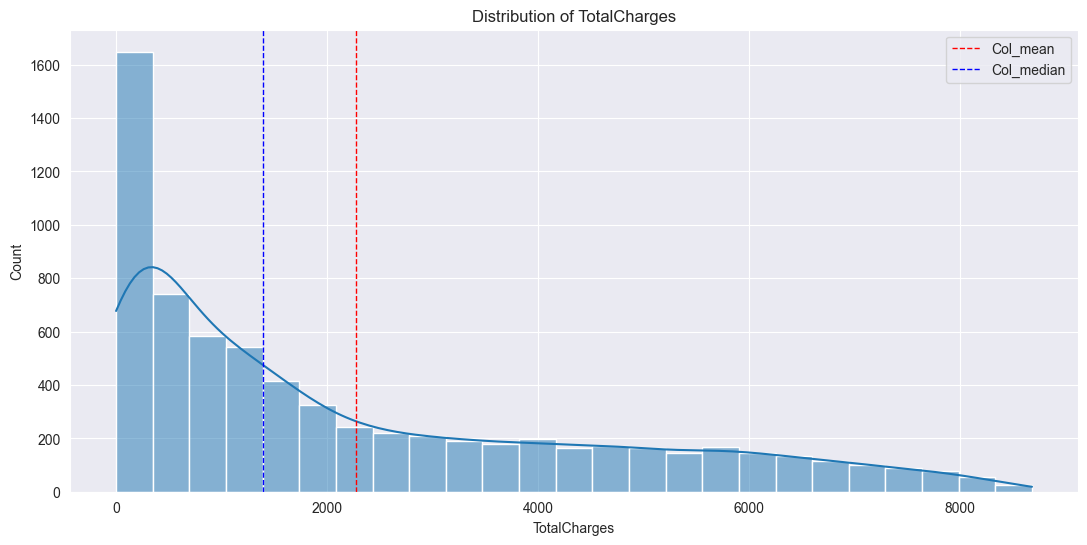

In [15]:
plot_histogram(df, 'TotalCharges')

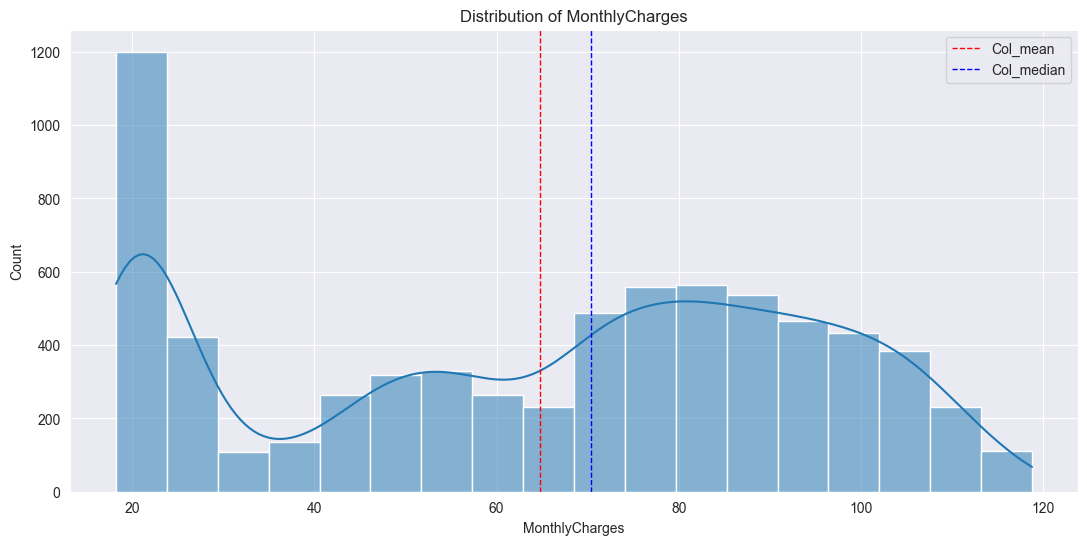

In [16]:
plot_histogram(df, 'MonthlyCharges')

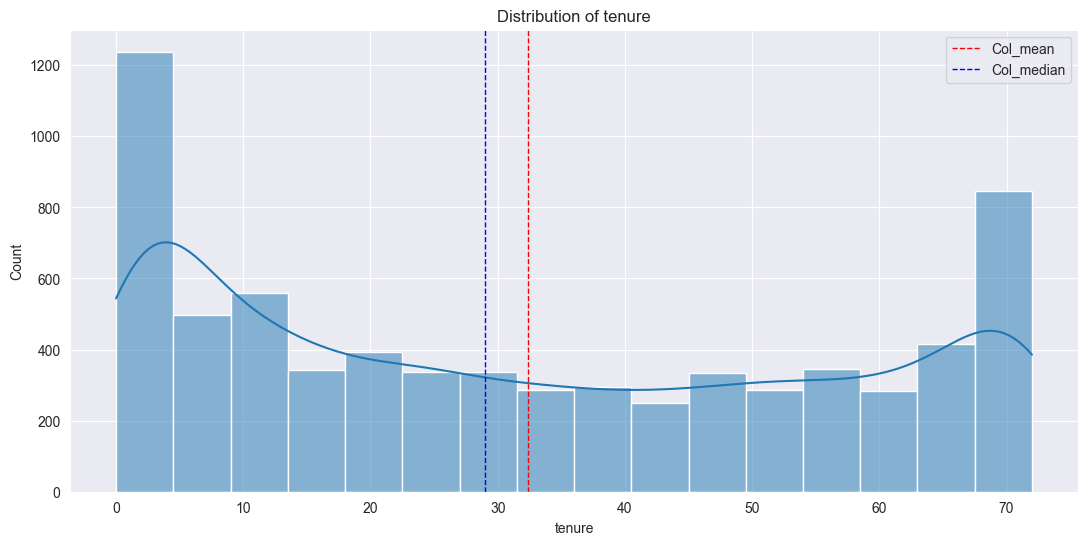

In [17]:
plot_histogram(df, 'tenure')

In [18]:
def box_plot(df, column_name):
    
    plt.figure(figsize = (10, 6))
    sns.boxplot(y = df[column_name])
    plt.title(f'Box plot of {column_name}')

    
    plt.show()

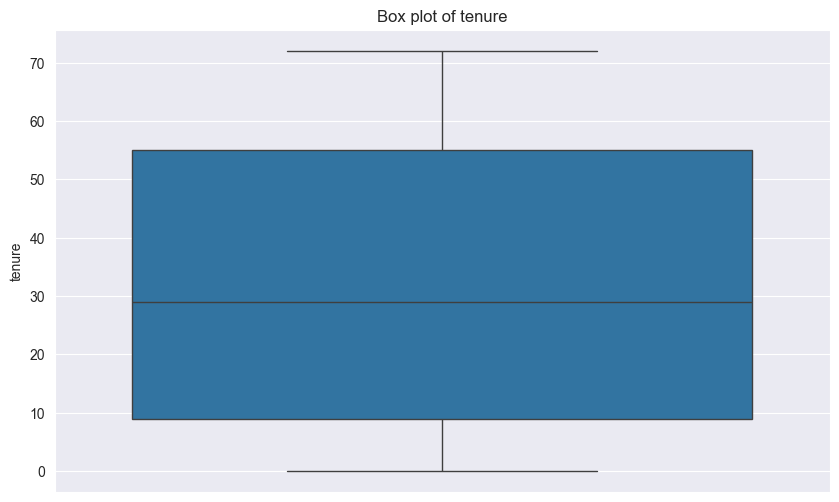

In [19]:
box_plot(df, 'tenure')

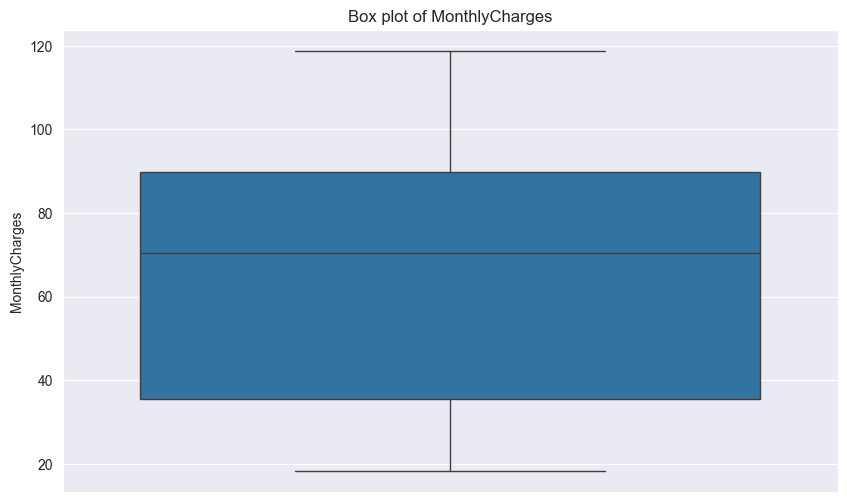

In [20]:
box_plot(df, 'MonthlyCharges')

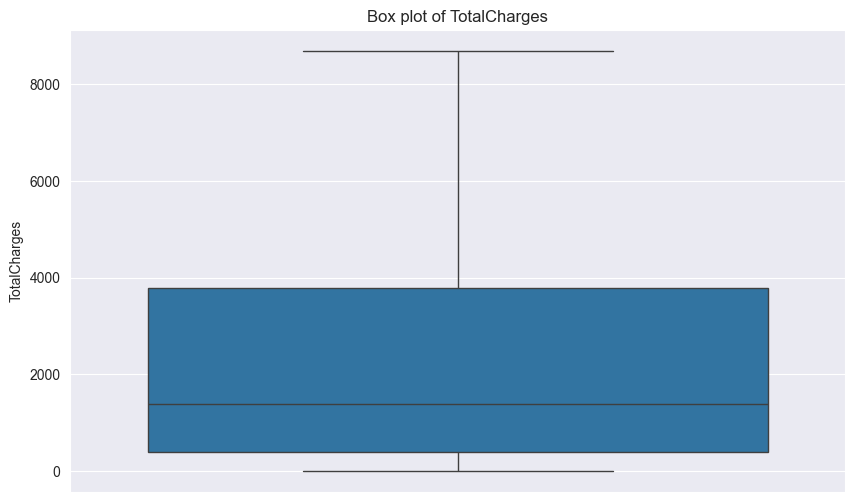

In [21]:
box_plot(df, 'TotalCharges')

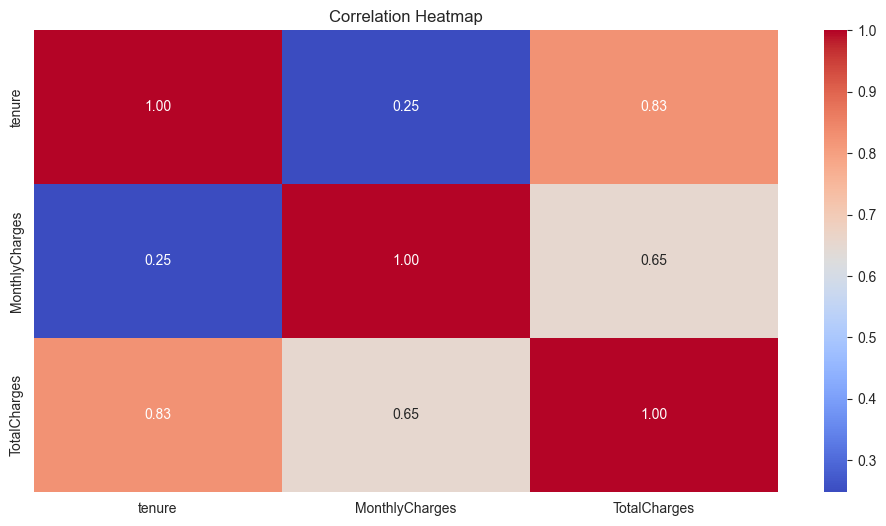

In [22]:
plt.figure(figsize = (12,6))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot = True,
             cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()

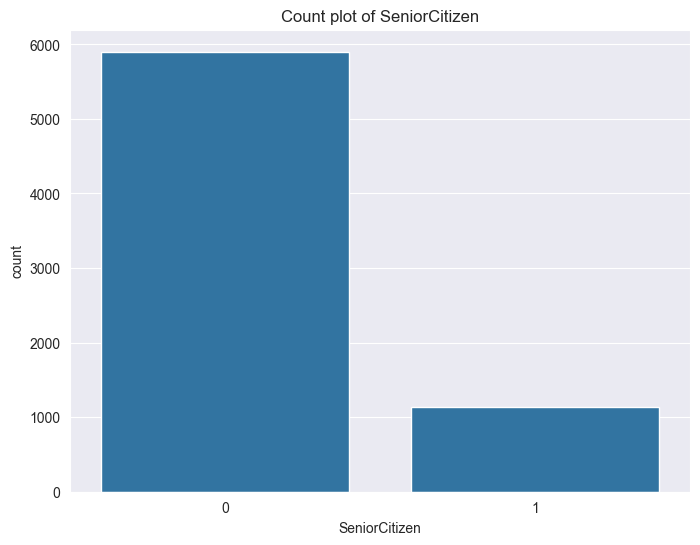

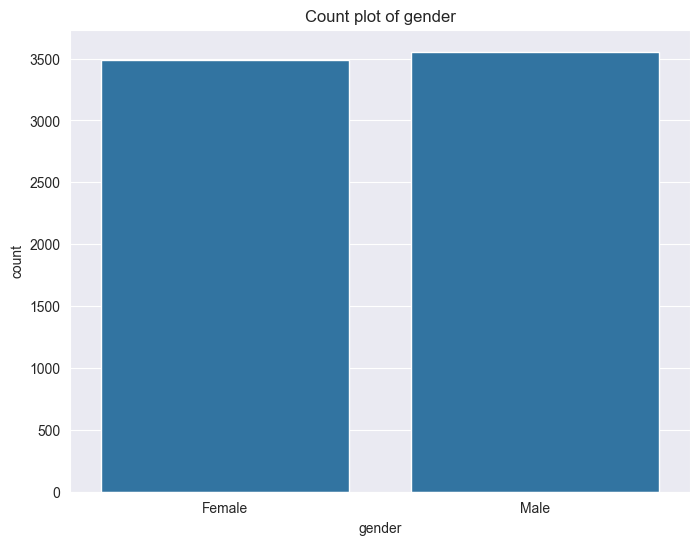

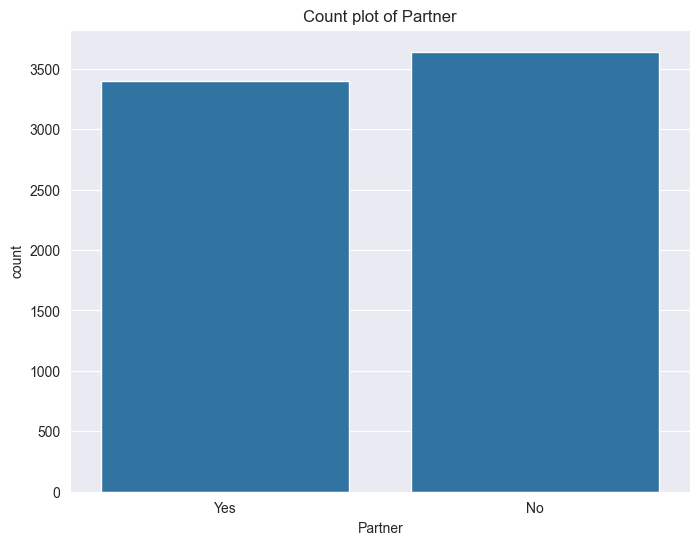

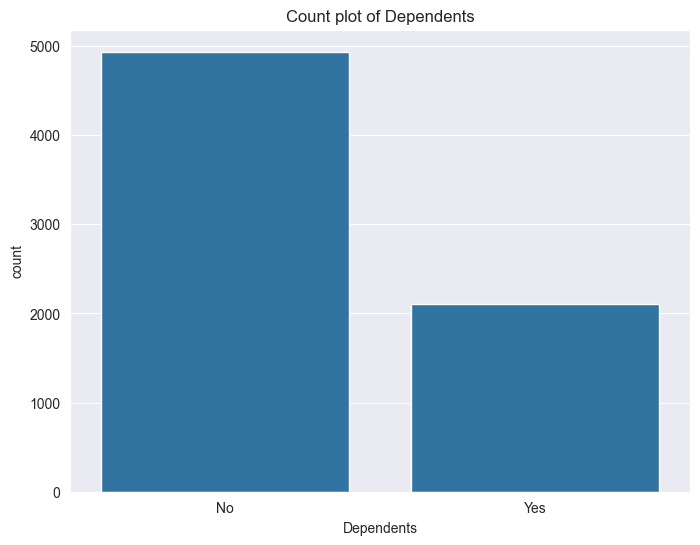

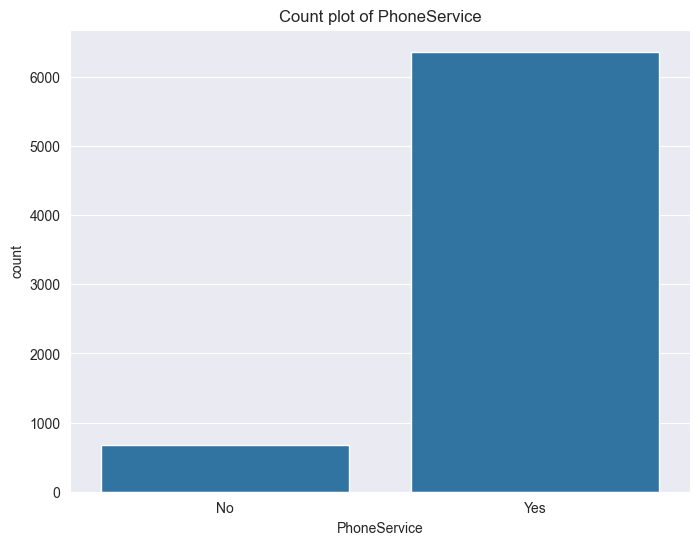

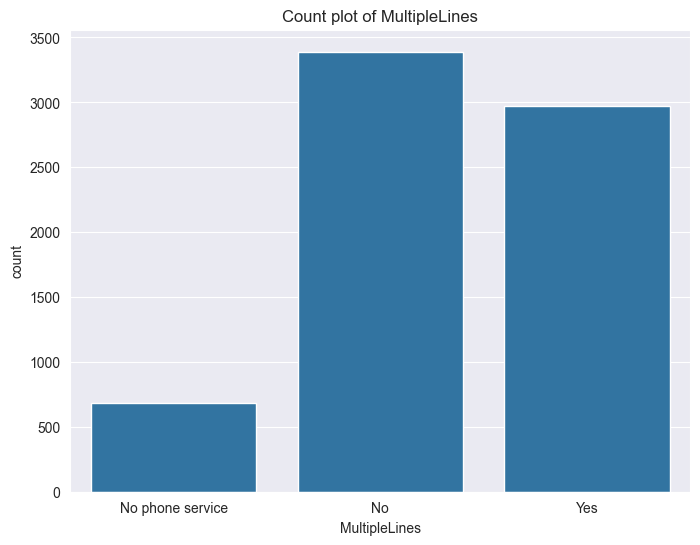

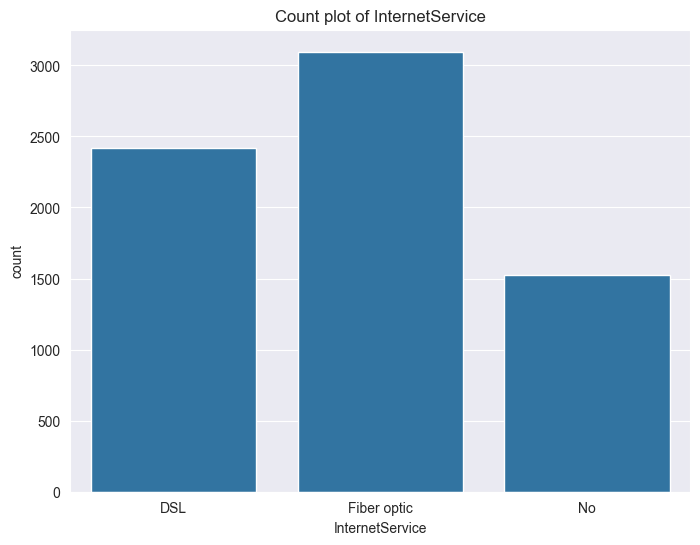

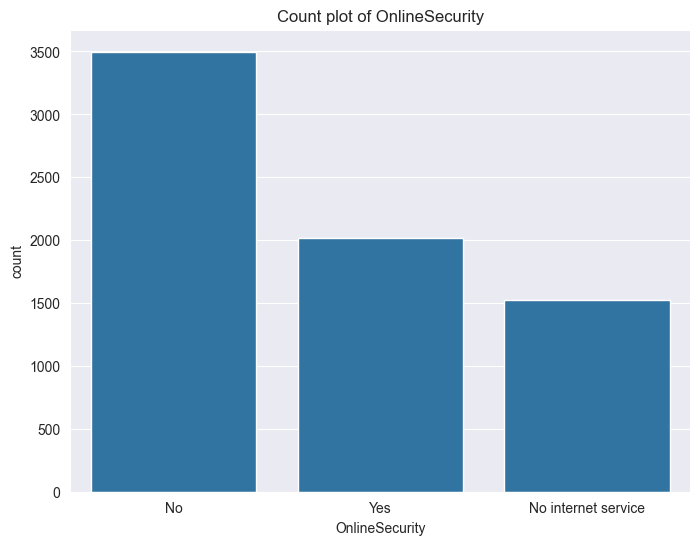

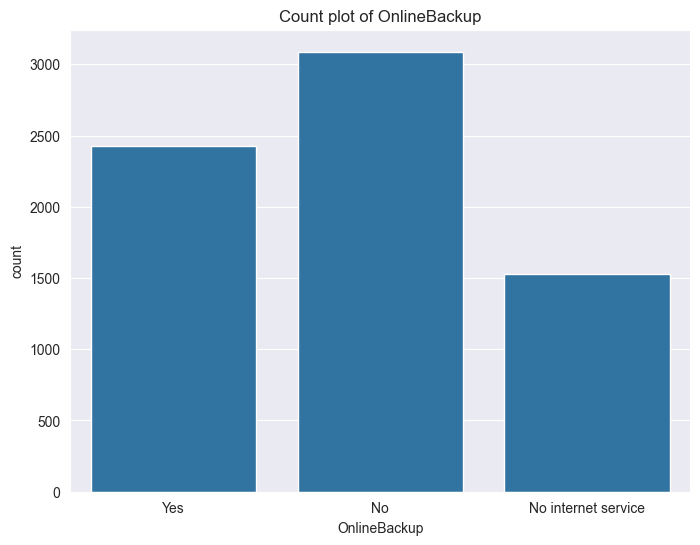

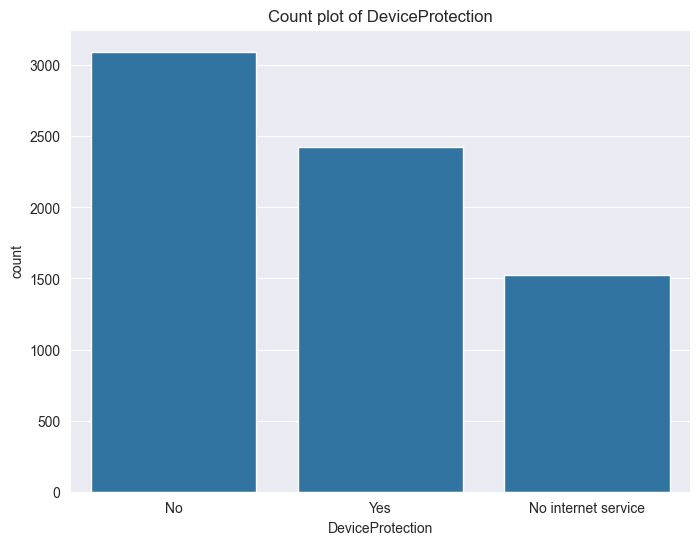

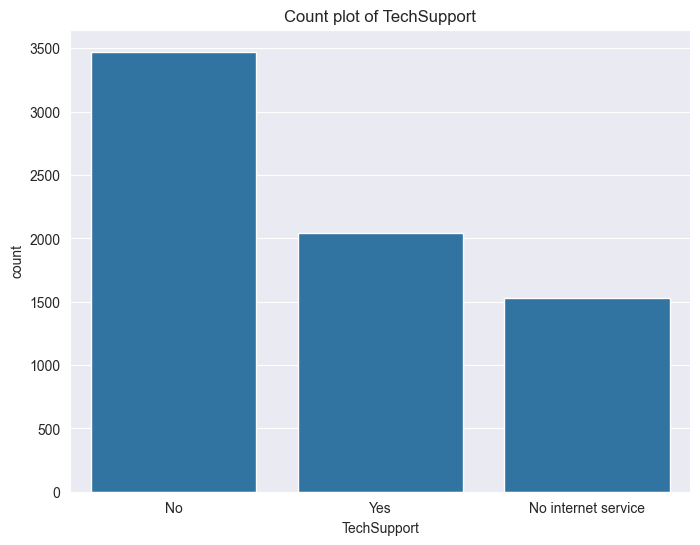

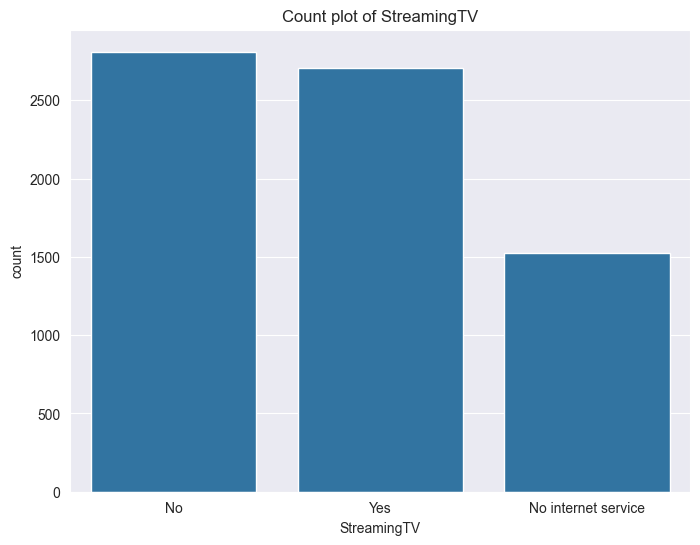

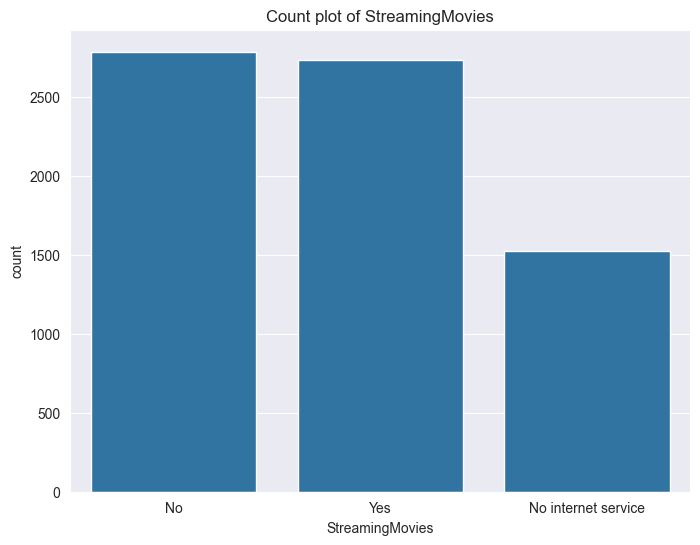

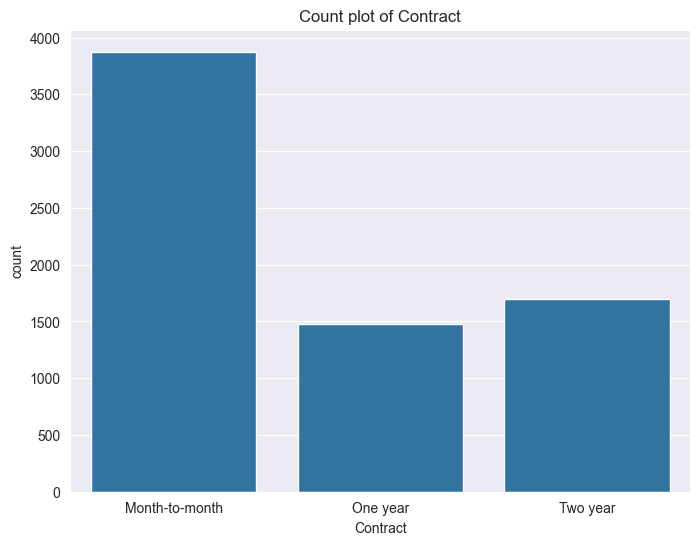

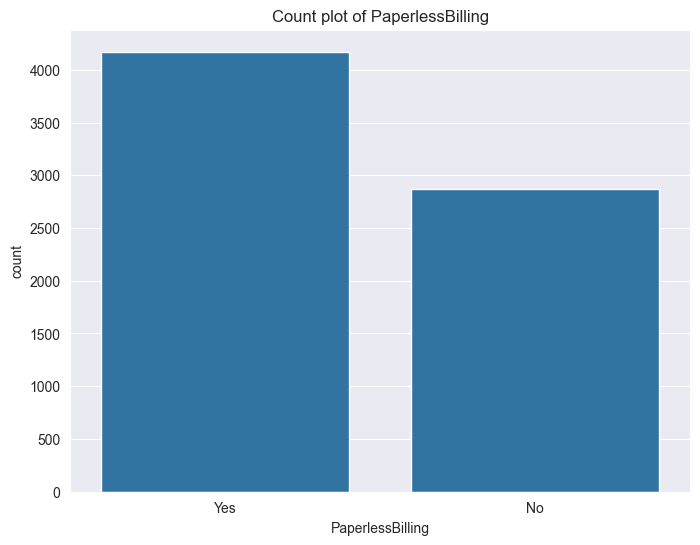

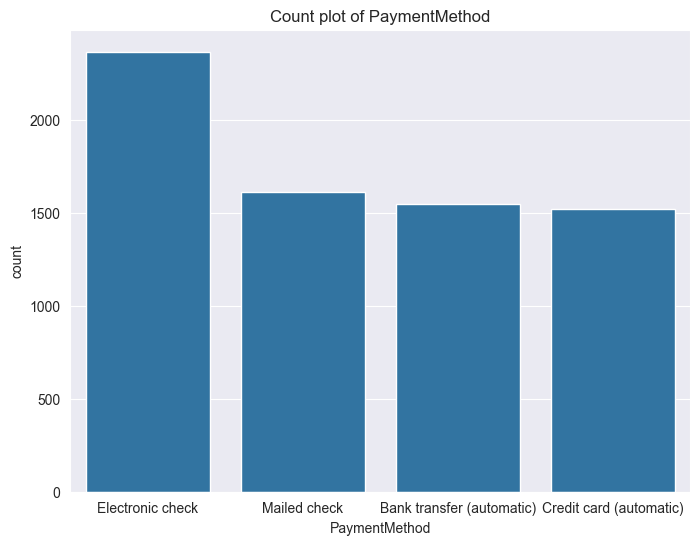

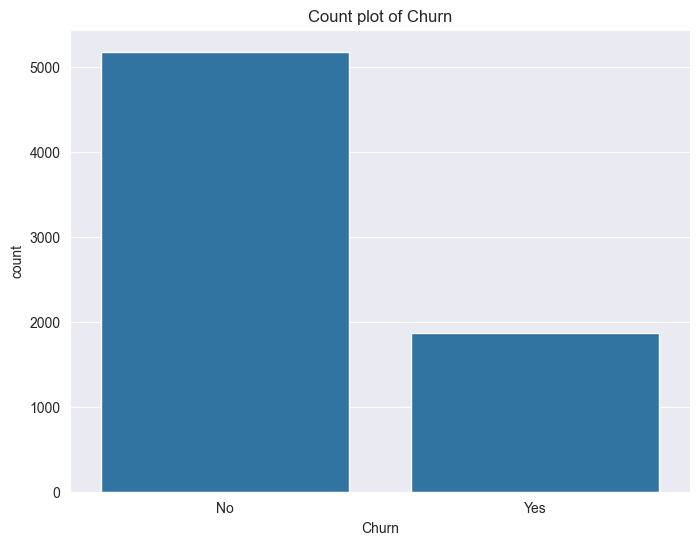

In [23]:
object_cols = df.select_dtypes(include = 'object').columns.to_list()

object_cols = ['SeniorCitizen'] + object_cols

for col in object_cols:
    plt.figure(figsize = (8,6))
    sns.countplot(x = df[col])
    plt.title(f'Count plot of {col}')
    plt.show()

In [24]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
unique_values_per_column = {col: df[col].unique() for col in df.columns}
unique_values_per_column

{'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39]),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object),
 'DeviceProtection': array(['No', 'Yes', 'No internet service'], dtype=object),
 'TechSupport': array(['No', 'Yes', 'No 

In [26]:
df.Churn = df.Churn.replace({'Yes':1, "No":0})
df.head(3)

C:\Users\BKJST\AppData\Local\Temp\ipykernel_26572\3447884602.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Churn = df.Churn.replace({'Yes':1, "No":0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [27]:
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [28]:
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [29]:
import pickle
from sklearn.preprocessing import LabelEncoder

encoders = {}

for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])  # Transform feature
    encoders[column] = label_encoder  # Store encoder in dictionary

# Save the complete dictionary **after** processing all columns
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [30]:
type(encoders)

dict

In [31]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [33]:
X = df.drop(columns = ['Churn'])
y = df.Churn

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 42)
len(X_train) , len(X_test), len(y_train), len(y_test)

(5634, 1409, 5634, 1409)

In [35]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


# Over sampling or up-sampling

In [36]:
smote = SMOTE(random_state = 42)
smote

SMOTE(random_state=42)

In [37]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote.shape, y_train_smote.shape

((8276, 19), (8276,))

In [38]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

# Model Training.

In [39]:
# dictionary of models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state = 42),
    'Random Forest': RandomForestClassifier(random_state = 42),
    'XGBoost' : XGBClassifier(random_forest = 42)
}
models

{'Decision Tree': DecisionTreeClassifier(random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, ...)}

In [40]:
cv_scores = {}

for model_name, model in models.items():
    print(model_name)
    print(model)
    print("_" *50)

Decision Tree
DecisionTreeClassifier(random_state=42)
__________________________________________________
Random Forest
RandomForestClassifier(random_state=42)
__________________________________________________
XGBoost
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
_____________________

In [41]:
for model_name, model in models.items():
    print(f'Training {model_name} with default parameters')
    scores = cross_val_score(model, X_train_smote, y_train_smote, 
                             cv = 5, scoring = 'accuracy')
    
    cv_scores[model_name] = scores
    print(f'{model_name} cross-validation accuracy: {np.mean(scores):.2f}')

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
Training XGBoost with default parameters


C:\Users\BKJST\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [01:33:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "random_forest" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\BKJST\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [01:33:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "random_forest" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\BKJST\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [01:33:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "random_forest" } are not used

XGBoost cross-validation accuracy: 0.83


In [42]:
cv_scores

{'Decision Tree': array([0.68115942, 0.71903323, 0.81752266, 0.84350453, 0.84350453]),
 'Random Forest': array([0.72705314, 0.76676737, 0.90453172, 0.89244713, 0.89848943]),
 'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

In [43]:
rfc = RandomForestClassifier(random_state=42)
rfc

RandomForestClassifier(random_state=42)

In [44]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [45]:
y_test.value_counts()

Churn
0    1036
1     373
Name: count, dtype: int64

In [46]:
y_test_pred = rfc.predict(X_test)

print('Accuracy Score:\n', accuracy_score(y_test, y_test_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_test_pred))
print('Classification Report:\n',classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7771469127040455
confusion matrix:
 [[880 156]
 [158 215]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



# Save trained model and load model

In [47]:
X.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [48]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_churn_model_1.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [49]:
with open('customer_churn_model_1.pkl', 'rb') as f:
    medel_data = pickle.load(f)

loaded_model = model_data['model']
features_names = model_data['features_names']


In [50]:
loaded_model

RandomForestClassifier(random_state=42)

In [51]:
# Features name means columns name excluding target column.
# in current scenario churn is target columns.

features_names

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [52]:
keys = ["gender", "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService",
        "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
        "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
        "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges"]

values = ["Female", 0, "Yes", "No", 1, "No", "No phone service", "DSL", "No", "Yes", "No",
          "No", "No", "No", "Month-to-month", "Yes", "Electronic check", 29.85, 29.85]

# Create dictionary
input_data = dict(zip(keys, values))

input_data

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'No',
 'tenure': 1,
 'PhoneService': 'No',
 'MultipleLines': 'No phone service',
 'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'No',
 'StreamingTV': 'No',
 'StreamingMovies': 'No',
 'Contract': 'Month-to-month',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Electronic check',
 'MonthlyCharges': 29.85,
 'TotalCharges': 29.85}

In [53]:
input_data_df = pd.DataFrame([input_data])
input_data_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [54]:
def prediction(prediction):
    if prediction == 0:
        print("This customer will not churn.")
    if prediction == 1:
        print('This customer highly chances to Churn.')
    else:
        print('Invalid input.')

In [55]:
input_data_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [56]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [57]:
print(df.Churn)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [58]:
with open("customer_churn_model_1.pkl", "rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]

In [59]:
for column, encoder in encoders.items():
    if column in input_data_df.columns:
        # Add new labels dynamically
        new_classes = set(input_data_df[column]) - set(encoder.classes_)
        if new_classes:
            encoder.classes_ = np.append(encoder.classes_, list(new_classes))
        input_data_df[column] = encoder.transform(input_data_df[column])
        

In [60]:
input_data_df = input_data_df[model_data["features_names"]]  # Align feature order

In [61]:
input_data_df = input_data_df.round(5)

In [62]:
print(input_data_df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85  


In [63]:
for column in object_columns:
    print(f"{column}: {input_data_df[column].unique()}")

gender: [0]
Partner: [1]
Dependents: [0]
PhoneService: [0]
MultipleLines: [1]
InternetService: [0]
OnlineSecurity: [0]
OnlineBackup: [2]
DeviceProtection: [0]
TechSupport: [0]
StreamingTV: [0]
StreamingMovies: [0]
Contract: [0]
PaperlessBilling: [1]
PaymentMethod: [2]


In [64]:
with open('encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

print("Loaded Encoders:", encoders.keys())  # Verify if all encoders exist

Loaded Encoders: dict_keys(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])


# Prediction

In [65]:
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(f"Prediction: {'Churn' if prediction[0] ==1 else 'No Churn.'}")
print(f"Prediction Probability: {pred_prob}") 
# it will return 2 value 1st chances of target. other predict other values.
# in my case churn 1, No curn 0. first value return chances of whatever prediction is.

loaded_model = model_data["model"]
# print("Model Parameters:", loaded_model.get_params())
print(loaded_model)

Prediction: No Churn.
Prediction Probability: [[0.83 0.17]]
RandomForestClassifier(random_state=42)
